# Homework


##Manuela Montoya González

#### a) Implement Euler procedure numerically to find y(x) from:
$$ \frac{dy}{dx} = yx^2 -1.2y $$

* the initial condition is: y(0)=1 over the interval [0,2] 
* the range of x is actually the interval [0,2]
* plot the y(x) for h=0.5
* on the same plot compare it with the analytical solution of this differential equation, which is: $$y(x) = e^{x^3/3 -1.2x} $$

HINTS:
- think of the problem in terms of vectors $x$ and $y$.
- in the loop refer to the indices of $x_i$, $y_i$ and the function $f(x_i,y_i)$
- you can use np.arange to define your vector $x$ based on h and range
- you can use np.zeros to initialize $y$, remember to set y[0]=1

https://numpy.org/doc/stable/reference/generated/numpy.arange.html

y=np.zeros(len(x))   
y[0]=1

ASK YOURSELF:

* what if the range changes to [-2,2] and so the initial condition: 
x(0)=-2, y(0)=0.76
* is your code still working?
* can you easily change h?



#### b) write a function euler_int() that accepts four arguments and returns two

x,y=euler_int(func,intrange,h,yinit)

intrange[0,2]
where func() is:

def func(xi,yi):
    return


and test your code by running the cell below. Compare with the plot below

In [85]:
import numpy as np
import matplotlib.pyplot as plt
def fun(x,y):
  return y*x**2-1.2*y

x = np.linspace(0,2,5)
y = np.zeros(len(x))
h = 0.5
y[0] = 1

for i in range(1,len(x)):
    y[i] = y[i-1] + fun(x[i-1],y[i-1])*h
    x[i] = x[i-1]+h
    print(x[i],y[i])

0.5 0.4
1.0 0.21000000000000002
1.5 0.18900000000000003
2.0 0.28822500000000006


Text(0.5, 1.0, 'Solucion vs x')

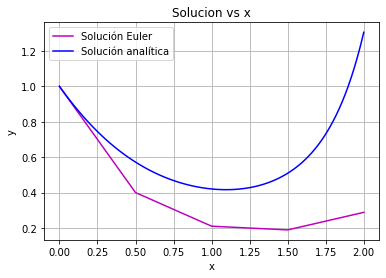

In [86]:
#Comprobamos
def sol(x):
  return np.exp((x**3)/3 - 1.2*x)

#Graficamos las dos soluciones
x1 = np.linspace(0.0,2.0,100)
y1 = sol(x1)
fig,ax=plt.subplots(1,1)
ax.plot(x,y,color='m',label='Solución Euler')
ax.plot(x1,y1,color='b',label='Solución analítica')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title('Solucion vs x')

In [87]:
#cambiando las condiciones
def fun(x,y):
  return y*x**2-1.2*y

xa = np.linspace(-2.0,2.0,10)
ya = np.zeros(len(xa))
h = 0.5
ya[0] = 0.76
xa[0] = -2.0

for i in range(1,len(xa)):
    ya[i] = ya[i-1] + fun(xa[i-1],ya[i-1])*h
    xa[i] = xa[i-1]+h
    print(xa[i],ya[i])

-1.5 1.824
-1.0 2.7816
-0.5 2.5034400000000003
0.0 1.3143060000000002
0.5 0.5257224000000001
1.0 0.2760042600000001
1.5 0.2484038340000001
2.0 0.3788158468500002
2.5 0.9091580324400006


Text(0.5, 1.0, 'Solucion vs x')

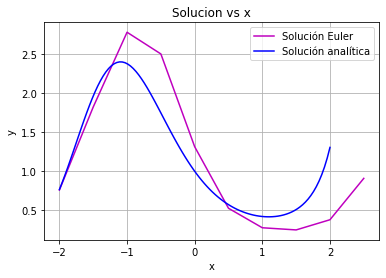

In [88]:
#Graficamos
x2 = np.linspace(-2.0,2.0,100)
y2 = sol(x2)
fig,ax=plt.subplots(1,1)
ax.plot(xa,ya,color='m',label='Solución Euler')
ax.plot(x2,y2,color='b',label='Solución analítica')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title('Solucion vs x')

In [89]:
#b)
def euler_int(func,intrange,h,yinit):
  n = int((intrange[-1] - intrange[0])/h + 1)
  x = np.zeros(n)
  y = np.zeros(n)
  x[0] = intrange[0]
  y[0] = yinit
  for i in range(n-1):
    x[i+1] = x[i] + h
    y[i+1] = y[i] + func(x[i],y[i])*h

  return x,y

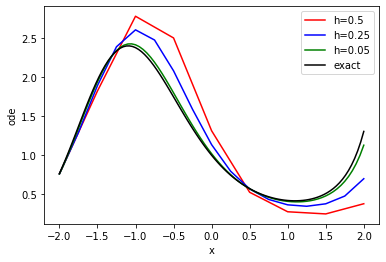

In [90]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)

intrange=[-2.0,2.0]
h=0.5
yinit=0.76
#func = fun
x1,y1=euler_int(fun,intrange,h,yinit)
ax.plot(x1,y1,'-r',label='h=0.5')

intrange=[-2.0,2.0]
h=0.25
yinit=0.76
x2,y2=euler_int(fun,intrange,h,yinit)
ax.plot(x2,y2,'-b',label='h=0.25')

intrange=[-2.0,2.0]
h=0.05
yinit=0.76
x3,y3=euler_int(fun,intrange,h,yinit)
ax.plot(x3,y3,'-g',label='h=0.05')

xexact=np.linspace(intrange[0],intrange[-1],101)
yexact=np.exp((xexact**3)/3-1.2*xexact)
ax.plot(xexact,yexact,'-k',label='exact')

ax.set_xlabel('x')
ax.set_ylabel('ode')
ax.legend()
#plt.show()

# Solve the same differential equation

$$ \frac{dy}{dx} = yx^2 -1.2y $$

with identical initial conditions, but using

* `scipy.integrate.odeint()`
* `scipy.integrate.solve_ivp()`

compare the results

In [91]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
def derivs(y,x):
  return y*x**2 - 1.2*y

#comprobamos 
def sol(x):
  return np.exp((x**3)/3 - 1.2*x)
x = np.linspace(-2.0,2.0,100)
y = sol(x)
#odeint
xodeint = np.linspace(-2.0,2.0,101)
y0 = 0.76
ys = odeint(derivs,y0,xodeint)
#solve_ivp
def derivs1(x,y):
  return y*x**2 - 1.2*y
xeval = np.linspace(-2.0,2.0,101)
y0 = [0.76]
ys1 = solve_ivp(derivs1,(-2.0,2.0),y0,t_eval=xeval)
print(ys1.t,'\n')
print(ys1.y[0])

[-2.   -1.96 -1.92 -1.88 -1.84 -1.8  -1.76 -1.72 -1.68 -1.64 -1.6  -1.56
 -1.52 -1.48 -1.44 -1.4  -1.36 -1.32 -1.28 -1.24 -1.2  -1.16 -1.12 -1.08
 -1.04 -1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6
 -0.56 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12
 -0.08 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36
  0.4   0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84
  0.88  0.92  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32
  1.36  1.4   1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8
  1.84  1.88  1.92  1.96  2.  ] 

[0.76       0.84737201 0.93888198 1.03396917 1.13186396 1.23168201
 1.33252585 1.43348481 1.53363509 1.63203972 1.72774855 1.81979829
 1.90721248 1.98901291 2.06438841 2.1327196  2.1934852  2.24625952
 2.2907124  2.32660927 2.35381112 2.3722745  2.38205152 2.38328987
 2.37623279 2.36121909 2.33868315 2.3091549  2.27325985 2.231716
 2.18507605 2.13391885 2.07891903 2.02071651 1.9599

Text(0.5, 1.0, 'Solucion EDO vs x')

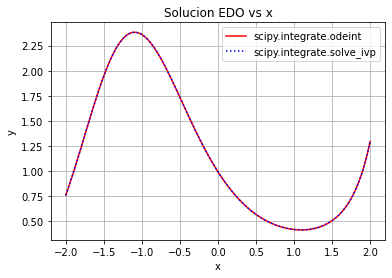

In [92]:
#Graficamos 
fig,ax=plt.subplots(1,1)
ax.plot(xodeint,ys[:,0],color='r',label='scipy.integrate.odeint')
ax.plot(ys1.t,ys1.y[0],':',color='b',label='scipy.integrate.solve_ivp')
#ax.scatter(x,y,color='m',label='Solución analítica')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title('Solucion EDO vs x')

In [93]:
#Ambas son excelentes soluciones, odeint resulta mucho mas rápido